<a href="https://colab.research.google.com/github/garfield-gray/Optimization/blob/main/NonConvex/gradient_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Gradient Backtracking

##1

In [45]:

import numpy.linalg as la
def gradient_method_backtracking(f, g, x0, s, alpha, beta, epsilon):
  x = x0
  grad = g(x)
  fun_val = f(x)
  iter = 0
  while la.norm(grad) > epsilon:
    iter = iter + 1
    t = s
    while fun_val - f(x - t * grad) < alpha * t * la.norm(grad)**2:
      t=beta*t
    x = x - t * grad
    fun_val = f(x)
    grad = g(x)
    # print('iter_number = {0:3d}'.format(iter),\
    #       'norm_grad = {0:2.6f}'.format(la.norm(grad)),\
    #       'fun_val = {0:2.6f}'.format(fun_val))
  return x, fun_val, iter

In [46]:
A = np.array([[1, 0], [0, 2]])
f = lambda x : x @ A @ x
g = lambda x : 2 * A @ x
x0 = np.array([2.0, 1.0])
print(gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5))

(array([0., 0.]), 0.0, 2)


In [47]:
iter

2

##2

In [48]:
A = np.array([[1, 0], [0, 0.01]])
x0 = np.array([0.01, 1.0])
print(gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5))

(array([0.        , 0.00049166]), 2.417269699979995e-09, 201)


##3

In [49]:
df = pd.DataFrame(columns=["s", "alpha", "beta", "iter"])
for s in np.arange(1, 3, 0.1):
  for alpha in np.arange(0.05, 0.5, 0.05):
    for beta in np.arange(0.05, 1, 0.05):
      new_row = {"s": s, "alpha": alpha, "beta": beta, "iter": gradient_method_backtracking(f, g, x0, s, alpha, beta, 1e-5)[2]}
      df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [50]:
df.where(df['iter']==df['iter'].min()).dropna()

,s,alpha,beta,iter
2568,2.5,0.05,0.2,154
2587,2.5,0.10,0.2,154
2606,2.5,0.15,0.2,154
2625,2.5,0.20,0.2,154
2644,2.5,0.25,0.2,154
2663,2.5,0.30,0.2,154
2682,2.5,0.35,0.2,154
2701,2.5,0.40,0.2,154
2720,2.5,0.45,0.2,154


In [51]:
gradient_method_backtracking(f, g, x0, 2.5, 0.1, 0.2, 1e-5)

(array([0.        , 0.00049972]), 2.4972243136839053e-09, 149)

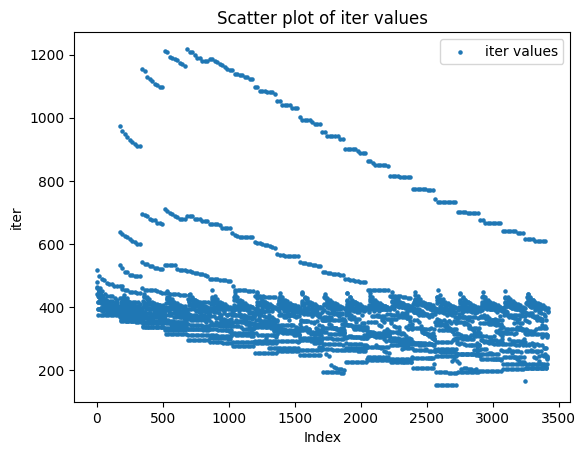

In [57]:
plt.scatter(df.index, df["iter"], label="iter values", s = 5)

# Set labels and title
plt.xlabel("Index")
plt.ylabel("iter")
plt.title("Scatter plot of iter values")

# Show legend
plt.legend()

# Show plot
plt.show()

##4

In [66]:
dfy = pd.DataFrame(columns=["y", "iter"])

for y in np.arange(0.001, 1.001, 0.001):
  A = np.array([[1, 0], [0, y]])
  new_row = {"y": y, "iter": gradient_method_backtracking(f, g, x0, 2.5, 0.05, 0.2, 1e-5)[2]}
  dfy = pd.concat([dfy, pd.DataFrame([new_row])], ignore_index=True)

In [67]:
dfy

,y,iter
0,0.001,1058
1,0.002,597
2,0.003,425
3,0.004,332
4,0.005,274
...,...,...
995,0.996,3
996,0.997,3
997,0.998,2
998,0.999,2


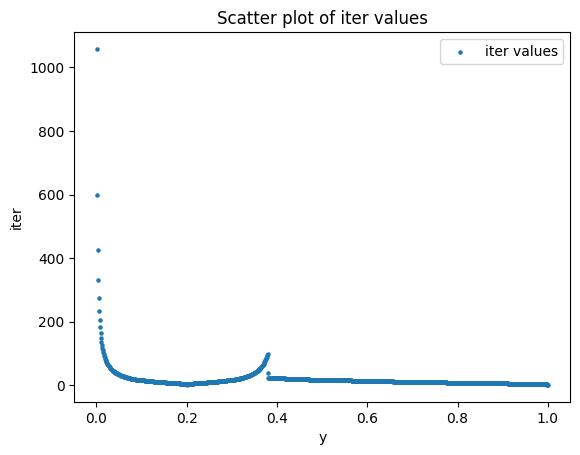

In [68]:
plt.scatter(dfy["y"], dfy["iter"], label="iter values", s = 5)

# Set labels and title
plt.xlabel("y")
plt.ylabel("iter")
plt.title("Scatter plot of iter values")

# Show legend
plt.legend()

# Show plot
plt.show()

In [69]:
dfy.where(dfy['iter']==dfy['iter'].min()).dropna()

,y,iter
999,1.0,1


#Pure Newton

In [70]:
def pure_netwon(f, g, h, x0, epsilon):
  x = x0
  gval = g(x)
  hval = h(x)
  iter = 0
  while la.norm(gval) > epsilon and iter < 10000:
    iter = iter + 1
    x = x - la.solve(hval, gval)
    fun_val = f(x)
    gval = g(x)
    hval = h(x)
    print('iter = {0:3d}'.format(iter),\
          'f(x) = {0:2.6f}'.format(fun_val))
    if (iter==10000):
      print('did not converge')
  return x

In [74]:
h = lambda x : np.diag([1200 * x[0]**2, 0.12 * x[1]**2])
x = pure_netwon(f, g, h, x0, epsilon)

iter =   1 f(x) = 19.755062
iter =   2 f(x) = 3.902234
iter =   3 f(x) = 0.770812
iter =   4 f(x) = 0.152259
iter =   5 f(x) = 0.030076
iter =   6 f(x) = 0.005941
iter =   7 f(x) = 0.001174
iter =   8 f(x) = 0.000232
iter =   9 f(x) = 0.000046
iter =  10 f(x) = 0.000009
iter =  11 f(x) = 0.000002
iter =  12 f(x) = 0.000000
iter =  13 f(x) = 0.000000
iter =  14 f(x) = 0.000000
iter =  15 f(x) = 0.000000
iter =  16 f(x) = 0.000000
iter =  17 f(x) = 0.000000


##1

##2

##3

##4